In [109]:
import pandas as pd
import sqlalchemy as sql
import pandas as pd
from config import password
from config import connection
import psycopg2 as pg
import pandas.io.sql as psql

In [110]:
sql_connection=(f'postgresql://postgres:{password}@{connection}:5432/postgres')

In [111]:
engine=sql.create_engine(sql_connection)

In [112]:
engine.table_names()

C:\Users\erica\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


['crime_dataset']

In [113]:
ml_df=pd.read_sql_query('select * from "crime_dataset"',con=engine)
ml_df

,Zip,med_age_weight,med_income_weight,month_housing_costs_weight,total_pop,med_age,med_income,month_housing_costs,Against Family/Child,Aggravated Assault,...,Rape,Receive Stolen Property,Robbery,Sex (except rape/prst),Vehicle Theft,Weapon (carry/poss),General Mental Health Program,General Mental Health Resource,Substance Abuse Program,Total_Crimes
0,90001,2549743.7,1.859720e+09,109830976.0,85439.0,29.842855,21766.634979,1285.489952,3.0,24.0,...,NaN,3.0,7.0,NaN,23.0,18.0,2.0,2.0,1.0,169.0
1,90002,1937620.4,1.426340e+09,93298147.0,67896.0,28.538064,21007.714563,1374.133189,15.0,87.0,...,NaN,4.0,25.0,NaN,35.0,73.0,1.0,4.0,1.0,452.0
2,90003,4043026.2,3.031933e+09,188588435.0,139506.0,28.981020,21733.352902,1351.830280,29.0,267.0,...,5.0,11.0,68.0,29.0,171.0,178.0,2.0,6.0,1.0,1695.0
3,90004,2865510.3,2.653570e+09,134322386.0,79367.0,36.104556,33434.173473,1692.421107,7.0,95.0,...,1.0,3.0,9.0,2.0,21.0,20.0,NaN,5.0,NaN,464.0
4,90005,2756055.6,2.265993e+09,118253352.0,74974.0,36.760152,30223.711860,1577.258143,8.0,61.0,...,1.0,1.0,13.0,4.0,19.0,5.0,2.0,12.0,1.0,274.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,91605,2993663.9,2.068394e+09,131516009.0,83290.0,35.942657,24833.641386,1579.013195,8.0,85.0,...,2.0,1.0,17.0,3.0,34.0,18.0,1.0,NaN,NaN,501.0
133,91606,3111975.0,2.432768e+09,130880558.0,84473.0,36.839878,28799.353012,1549.377411,5.0,66.0,...,2.0,NaN,9.0,3.0,24.0,13.0,1.0,8.0,NaN,330.0
134,91607,1185934.1,1.237387e+09,54131771.0,31101.0,38.131703,39786.095495,1740.515450,1.0,22.0,...,NaN,NaN,4.0,2.0,6.0,1.0,NaN,NaN,NaN,91.0
135,91608,171398.5,2.552632e+08,12431100.0,3767.0,45.500000,67763.000000,3300.000000,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [114]:
ml_df=ml_df.set_index('Zip')
ml_df.head()

,med_age_weight,med_income_weight,month_housing_costs_weight,total_pop,med_age,med_income,month_housing_costs,Against Family/Child,Aggravated Assault,Burglary,...,Rape,Receive Stolen Property,Robbery,Sex (except rape/prst),Vehicle Theft,Weapon (carry/poss),General Mental Health Program,General Mental Health Resource,Substance Abuse Program,Total_Crimes
Zip,,,,,,,,,,,,,,,,,,,,,
90001,2549743.7,1.859720e+09,109830976.0,85439.0,29.842855,21766.634979,1285.489952,3.0,24.0,4.0,...,NaN,3.0,7.0,NaN,23.0,18.0,2.0,2.0,1.0,169.0
90002,1937620.4,1.426340e+09,93298147.0,67896.0,28.538064,21007.714563,1374.133189,15.0,87.0,12.0,...,NaN,4.0,25.0,NaN,35.0,73.0,1.0,4.0,1.0,452.0
90003,4043026.2,3.031933e+09,188588435.0,139506.0,28.981020,21733.352902,1351.830280,29.0,267.0,51.0,...,5.0,11.0,68.0,29.0,171.0,178.0,2.0,6.0,1.0,1695.0
90004,2865510.3,2.653570e+09,134322386.0,79367.0,36.104556,33434.173473,1692.421107,7.0,95.0,21.0,...,1.0,3.0,9.0,2.0,21.0,20.0,NaN,5.0,NaN,464.0
90005,2756055.6,2.265993e+09,118253352.0,74974.0,36.760152,30223.711860,1577.258143,8.0,61.0,20.0,...,1.0,1.0,13.0,4.0,19.0,5.0,2.0,12.0,1.0,274.0


In [115]:
#ml_df = ml_df[ml_df['Total_Crimes']>3]
#ml_df

In [116]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 90001 to 91803
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   med_age_weight                  135 non-null    float64
 1   med_income_weight               135 non-null    float64
 2   month_housing_costs_weight      135 non-null    float64
 3   total_pop                       135 non-null    float64
 4   med_age                         135 non-null    float64
 5   med_income                      135 non-null    float64
 6   month_housing_costs             135 non-null    float64
 7   Against Family/Child            95 non-null     float64
 8   Aggravated Assault              117 non-null    float64
 9   Burglary                        108 non-null    float64
 10  Disorderly Conduct              41 non-null     float64
 11  Disturbing the Peace            9 non-null      float64
 12  Driving Under Influence       

In [117]:
import numpy as np
# drop rows where demographic info is na
ml_df=ml_df[~ml_df['med_age_weight'].isna()]

In [118]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 90001 to 91803
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   med_age_weight                  135 non-null    float64
 1   med_income_weight               135 non-null    float64
 2   month_housing_costs_weight      135 non-null    float64
 3   total_pop                       135 non-null    float64
 4   med_age                         135 non-null    float64
 5   med_income                      135 non-null    float64
 6   month_housing_costs             135 non-null    float64
 7   Against Family/Child            95 non-null     float64
 8   Aggravated Assault              115 non-null    float64
 9   Burglary                        108 non-null    float64
 10  Disorderly Conduct              41 non-null     float64
 11  Disturbing the Peace            9 non-null      float64
 12  Driving Under Influence       

In [174]:
ml_df=ml_df.drop(columns=['med_age', 'med_income', 'month_housing_costs'])

In [175]:
ml_df = ml_df.fillna(0)
ml_df

,med_age_weight,med_income_weight,month_housing_costs_weight,total_pop,Against Family/Child,Aggravated Assault,Burglary,Disorderly Conduct,Disturbing the Peace,Driving Under Influence,...,Receive Stolen Property,Robbery,Sex (except rape/prst),Vehicle Theft,Weapon (carry/poss),General Mental Health Program,General Mental Health Resource,Substance Abuse Program,Total_Crimes,Crime_Ranges
Zip,,,,,,,,,,,,,,,,,,,,,
90001,2549743.7,1.859720e+09,109830976.0,85439.0,3.0,0.000281,0.000047,0.000000,0.000000,0.000492,...,0.000035,0.000082,0.000000,0.000269,0.000211,0.000023,0.000023,0.000012,169.0,1
90002,1937620.4,1.426340e+09,93298147.0,67896.0,15.0,0.001281,0.000177,0.000029,0.000000,0.000471,...,0.000059,0.000368,0.000000,0.000515,0.001075,0.000015,0.000059,0.000015,452.0,2
90003,4043026.2,3.031933e+09,188588435.0,139506.0,29.0,0.001914,0.000366,0.000022,0.000000,0.001398,...,0.000079,0.000487,0.000208,0.001226,0.001276,0.000014,0.000043,0.000007,1695.0,3
90004,2865510.3,2.653570e+09,134322386.0,79367.0,7.0,0.001197,0.000265,0.000013,0.000000,0.000617,...,0.000038,0.000113,0.000025,0.000265,0.000252,0.000000,0.000063,0.000000,464.0,2
90005,2756055.6,2.265993e+09,118253352.0,74974.0,8.0,0.000814,0.000267,0.000000,0.000000,0.000293,...,0.000013,0.000173,0.000053,0.000253,0.000067,0.000027,0.000160,0.000013,274.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91605,2993663.9,2.068394e+09,131516009.0,83290.0,8.0,0.001021,0.000156,0.000012,0.000000,0.000912,...,0.000012,0.000204,0.000036,0.000408,0.000216,0.000012,0.000000,0.000000,501.0,3
91606,3111975.0,2.432768e+09,130880558.0,84473.0,5.0,0.000781,0.000142,0.000000,0.000012,0.000367,...,0.000000,0.000107,0.000036,0.000284,0.000154,0.000012,0.000095,0.000000,330.0,2
91607,1185934.1,1.237387e+09,54131771.0,31101.0,1.0,0.000707,0.000129,0.000032,0.000000,0.000225,...,0.000000,0.000129,0.000064,0.000193,0.000032,0.000000,0.000000,0.000000,91.0,0


In [176]:
# to_drop = [93599,93306,93350,93434,91911,92105,91762,91730,91705,90509,90009]

# ml_df = ml_df[ml_df.Zip.isin(to_drop) == False]
# ml_df

In [177]:
binning = ml_df.Total_Crimes.value_counts()
binning.sort_values(ascending=False)
print(binning)

1.0      8
3.0      4
2.0      4
4.0      3
16.0     3
        ..
67.0     1
382.0    1
910.0    1
172.0    1
91.0     1
Name: Total_Crimes, Length: 115, dtype: int64


In [178]:
def binning(x):
    if x < 100.00:
        return '0-99'
    elif x < 300.00:
        return '100-299'
    elif x < 500.00:
        return '300-499'
    elif x > 500.00:
        return '500+'
    else: 
        return 'NaN'
    

In [179]:
ml_df['Crime_Ranges'] = ml_df['Total_Crimes'].apply(binning)
ml_df.head(20)

,med_age_weight,med_income_weight,month_housing_costs_weight,total_pop,Against Family/Child,Aggravated Assault,Burglary,Disorderly Conduct,Disturbing the Peace,Driving Under Influence,...,Receive Stolen Property,Robbery,Sex (except rape/prst),Vehicle Theft,Weapon (carry/poss),General Mental Health Program,General Mental Health Resource,Substance Abuse Program,Total_Crimes,Crime_Ranges
Zip,,,,,,,,,,,,,,,,,,,,,
90001,2549743.7,1.859720e+09,109830976.0,85439.0,3.0,0.000281,0.000047,0.000000,0.000000,0.000492,...,0.000035,0.000082,0.000000,0.000269,0.000211,0.000023,0.000023,0.000012,169.0,100-299
90002,1937620.4,1.426340e+09,93298147.0,67896.0,15.0,0.001281,0.000177,0.000029,0.000000,0.000471,...,0.000059,0.000368,0.000000,0.000515,0.001075,0.000015,0.000059,0.000015,452.0,300-499
90003,4043026.2,3.031933e+09,188588435.0,139506.0,29.0,0.001914,0.000366,0.000022,0.000000,0.001398,...,0.000079,0.000487,0.000208,0.001226,0.001276,0.000014,0.000043,0.000007,1695.0,500+
90004,2865510.3,2.653570e+09,134322386.0,79367.0,7.0,0.001197,0.000265,0.000013,0.000000,0.000617,...,0.000038,0.000113,0.000025,0.000265,0.000252,0.000000,0.000063,0.000000,464.0,300-499
90005,2756055.6,2.265993e+09,118253352.0,74974.0,8.0,0.000814,0.000267,0.000000,0.000000,0.000293,...,0.000013,0.000173,0.000053,0.000253,0.000067,0.000027,0.000160,0.000013,274.0,100-299
90006,3303160.5,2.081109e+09,114453697.0,95783.0,3.0,0.001263,0.000292,0.000000,0.000000,0.001075,...,0.000042,0.000345,0.000094,0.000459,0.000240,0.000021,0.000000,0.000000,724.0,500+
90007,2363958.7,1.468942e+09,95163664.0,78348.0,5.0,0.000957,0.000408,0.000026,0.000000,0.000549,...,0.000051,0.000396,0.000064,0.000855,0.000791,0.000064,0.000064,0.000013,534.0,500+
90008,1223573.6,1.148752e+09,51664810.0,28440.0,8.0,0.002637,0.000246,0.000000,0.000035,0.000774,...,0.000000,0.000246,0.000035,0.000844,0.001125,0.000246,0.000422,0.000176,304.0,300-499
90010,1762718.9,1.548477e+09,80177287.0,47517.0,0.0,0.000274,0.000105,0.000021,0.000000,0.000042,...,0.000000,0.000126,0.000021,0.000105,0.000105,0.000063,0.000126,0.000042,73.0,0-99


In [180]:
binning = ml_df.Crime_Ranges.value_counts()
binning

0-99       55
100-299    33
300-499    26
500+       21
Name: Crime_Ranges, dtype: int64

In [181]:
# ml_df = ml_df.drop(columns=['Total_Crimes'])

In [182]:
#  Against Family/Child            95 non-null     float64
# 9   Aggravated Assault              117 non-null    float64
# 10  Burglary                        108 non-null    float64
# 11  Disorderly Conduct              41 non-null     float64
# 12  Disturbing the Peace            9 non-null      float64
# 13  Driving Under Influence         116 non-null    float64
# 14  Drunkeness                      30 non-null     float64
# 15  Federal Offenses                14 non-null     float64
# 16  Forgery/Counterfeit             50 non-null     float64
# 17  Fraud/Embezzlement              85 non-null     float64
# 18  Gambling                        7 non-null      float64
# 19  Homicide                        69 non-null     float64
# 20  Larceny                         109 non-null    float64
# 21  Liquor Laws                     5 non-null      float64
# 22  Miscellaneous Other Violations  119 non-null    float64
# 23  Moving Traffic Violations       104 non-null    float64
# 24  Narcotic Drug Laws              115 non-null    float64
# 25  Non-Criminal Detention          18 non-null     float64
# 26  Other Assaults                  118 non-null    float64
#  27  Pre-Delinquency                 2 non-null      float64
 #28  Prostitution/Allied             49 non-null     float64
 #29  Rape                            63 non-null     float64
 #30  Receive Stolen Property         74 non-null     float64
 #31  Robbery                         110 non-null    float64
 #32  Sex (except rape/prst)          86 non-null     float64
 #33  Vehicle Theft                   109 non-null    float64
 #34  Weapon (carry/poss)             111 non-null    float64
 #35  General Mental Health Program   77 non-null     float64
 #36  General Mental Health Resource  96 non-null     float64
 #37  Substance Abuse Program         33 non-null     float64

In [183]:
ml_df['Aggravated Assault'] = ml_df['Aggravated Assault']/ml_df['total_pop'] 
ml_df['Burglary'] = ml_df['Burglary']/ml_df['total_pop']
ml_df['Disorderly Conduct'] = ml_df['Disorderly Conduct']/ml_df['total_pop']
ml_df['Disturbing the Peace'] = ml_df['Disturbing the Peace']/ml_df['total_pop']
ml_df['Driving Under Influence'] = ml_df['Driving Under Influence']/ml_df['total_pop']
ml_df['Drunkeness'] = ml_df['Drunkeness']/ml_df['total_pop']
ml_df['Federal Offenses'] = ml_df['Federal Offenses']/ml_df['total_pop']
ml_df['Forgery/Counterfeit'] = ml_df['Forgery/Counterfeit']/ml_df['total_pop']
ml_df['Fraud/Embezzlement'] = ml_df['Fraud/Embezzlement']/ml_df['total_pop']
ml_df['Gambling'] = ml_df['Gambling']/ml_df['total_pop']
ml_df['Homicide'] = ml_df['Homicide']/ml_df['total_pop']
ml_df['Larceny'] = ml_df['Larceny']/ml_df['total_pop']
ml_df['Liquor Laws'] = ml_df['Liquor Laws']/ml_df['total_pop']
ml_df['Miscellaneous Other Violations'] = ml_df['Miscellaneous Other Violations']/ml_df['total_pop']
ml_df['Moving Traffic Violations'] = ml_df['Moving Traffic Violations']/ml_df['total_pop']
ml_df['Narcotic Drug Laws'] = ml_df['Narcotic Drug Laws']/ml_df['total_pop']
ml_df['Non-Criminal Detention'] = ml_df['Non-Criminal Detention']/ml_df['total_pop']
ml_df['Other Assaults'] = ml_df['Other Assaults']/ml_df['total_pop']
ml_df['Pre-Delinquency'] = ml_df['Pre-Delinquency']/ml_df['total_pop']
ml_df['Prostitution/Allied'] = ml_df['Prostitution/Allied']/ml_df['total_pop']
ml_df['Rape'] = ml_df['Rape']/ml_df['total_pop']
ml_df['Receive Stolen Property'] = ml_df['Receive Stolen Property']/ml_df['total_pop']
ml_df['Robbery'] = ml_df['Robbery']/ml_df['total_pop']
ml_df['Sex (except rape/prst)'] = ml_df['Sex (except rape/prst)']/ml_df['total_pop']
ml_df['Vehicle Theft'] = ml_df['Vehicle Theft']/ml_df['total_pop']
ml_df['Weapon (carry/poss)'] = ml_df['Weapon (carry/poss)']/ml_df['total_pop']
ml_df['General Mental Health Program'] = ml_df['General Mental Health Program']/ml_df['total_pop']
ml_df['General Mental Health Resource'] = ml_df['General Mental Health Resource']/ml_df['total_pop']
ml_df['Substance Abuse Program'] = ml_df['Substance Abuse Program']/ml_df['total_pop']

In [184]:
ml_df.head()

,med_age_weight,med_income_weight,month_housing_costs_weight,total_pop,Against Family/Child,Aggravated Assault,Burglary,Disorderly Conduct,Disturbing the Peace,Driving Under Influence,...,Receive Stolen Property,Robbery,Sex (except rape/prst),Vehicle Theft,Weapon (carry/poss),General Mental Health Program,General Mental Health Resource,Substance Abuse Program,Total_Crimes,Crime_Ranges
Zip,,,,,,,,,,,,,,,,,,,,,
90001,2549743.7,1.859720e+09,109830976.0,85439.0,3.0,3.287751e-09,5.479585e-10,0.000000e+00,0.0,5.753564e-09,...,4.109689e-10,9.589274e-10,0.000000e+00,3.150761e-09,2.465813e-09,2.739793e-10,2.739793e-10,1.369896e-10,169.0,100-299
90002,1937620.4,1.426340e+09,93298147.0,67896.0,15.0,1.887256e-08,2.603112e-09,4.338520e-10,0.0,6.941632e-09,...,8.677040e-10,5.423150e-09,0.000000e+00,7.592410e-09,1.583560e-08,2.169260e-10,8.677040e-10,2.169260e-10,452.0,300-499
90003,4043026.2,3.031933e+09,188588435.0,139506.0,29.0,1.371910e-08,2.620501e-09,1.541471e-10,0.0,1.001956e-08,...,5.652062e-10,3.494002e-09,1.490089e-09,8.786387e-09,9.146064e-09,1.027648e-10,3.082943e-10,5.138238e-11,1695.0,500+
90004,2865510.3,2.653570e+09,134322386.0,79367.0,7.0,1.508147e-08,3.333799e-09,1.587523e-10,0.0,7.778863e-09,...,4.762569e-10,1.428771e-09,3.175046e-10,3.333799e-09,3.175046e-09,0.000000e+00,7.937616e-10,0.000000e+00,464.0,300-499
90005,2756055.6,2.265993e+09,118253352.0,74974.0,8.0,1.085197e-08,3.558022e-09,0.000000e+00,0.0,3.913824e-09,...,1.779011e-10,2.312714e-09,7.116044e-10,3.380121e-09,8.895055e-10,3.558022e-10,2.134813e-09,1.779011e-10,274.0,100-299


In [185]:
# import numpy as np
# ml_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [186]:
# ml_df = ml_df.fillna(0)

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [188]:
y =ml_df.Crime_Ranges
X = ml_df.drop(columns=['Crime_Ranges', 'Total_Crimes']).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.33)

In [189]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [191]:
# Create a random forest classifier. *
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.733


In [192]:
from sklearn.metrics import confusion_matrix, classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        0-99       0.71      0.89      0.79        19
     100-299       0.70      0.58      0.64        12
     300-499       0.71      0.62      0.67         8
        500+       1.00      0.67      0.80         6

    accuracy                           0.73        45
   macro avg       0.78      0.69      0.72        45
weighted avg       0.75      0.73      0.73        45



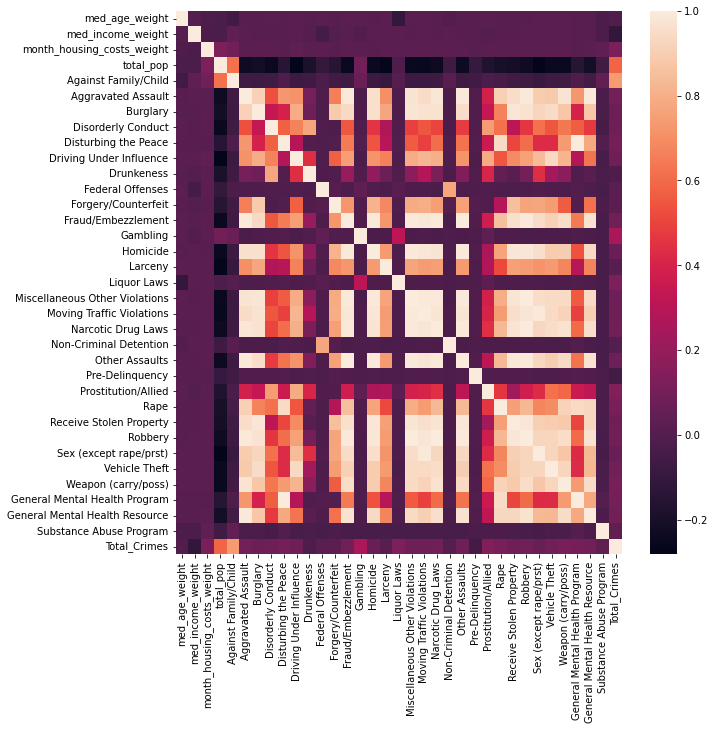

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(ml_df.corr())
plt.show()

In [194]:
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.07158746016935566, 'total_pop'),
 (0.06920428975453378, 'Against Family/Child'),
 (0.05609785013600617, 'Fraud/Embezzlement'),
 (0.05389925200120321, 'Vehicle Theft'),
 (0.05236324449965035, 'Weapon (carry/poss)'),
 (0.048122385522720405, 'Moving Traffic Violations'),
 (0.047055684065012954, 'med_age_weight'),
 (0.04224135693121842, 'Burglary'),
 (0.040422101719215404, 'Receive Stolen Property'),
 (0.03954376062334958, 'Homicide'),
 (0.03835165306866665, 'Sex (except rape/prst)'),
 (0.03791158813053581, 'Aggravated Assault'),
 (0.03744823746383525, 'Rape'),
 (0.03735435827046675, 'Driving Under Influence'),
 (0.03599944195758541, 'month_housing_costs_weight'),
 (0.030761862430052297, 'Forgery/Counterfeit'),
 (0.030602257978134963, 'Larceny'),
 (0.030550055155009546, 'med_income_weight'),
 (0.027382249933193898, 'Miscellaneous Other Violations'),
 (0.025653987582117788, 'Other Assaults'),
 (0.024340696344500763, 'Robbery'),
 (0.02314847878755779, 'Narcotic Drug Laws'),
 (0.017742299

In [195]:
def binning(x):
    if x < 100.00:
        # return '0-99'
        return 0
    elif x < 300.00:
        # return '100-299'
        return 1
    elif x < 500.00:
        # return '300-499'
        return 2
    elif x > 500.00:
        # return '500+'
        return 3
#     else: 
#         return 'NaN'
    

In [196]:
ml_df['Crime_Ranges'] = ml_df['Total_Crimes'].apply(binning)
ml_df.head(20)

,med_age_weight,med_income_weight,month_housing_costs_weight,total_pop,Against Family/Child,Aggravated Assault,Burglary,Disorderly Conduct,Disturbing the Peace,Driving Under Influence,...,Receive Stolen Property,Robbery,Sex (except rape/prst),Vehicle Theft,Weapon (carry/poss),General Mental Health Program,General Mental Health Resource,Substance Abuse Program,Total_Crimes,Crime_Ranges
Zip,,,,,,,,,,,,,,,,,,,,,
90001,2549743.7,1.859720e+09,109830976.0,85439.0,3.0,3.287751e-09,5.479585e-10,0.000000e+00,0.000000e+00,5.753564e-09,...,4.109689e-10,9.589274e-10,0.000000e+00,3.150761e-09,2.465813e-09,2.739793e-10,2.739793e-10,1.369896e-10,169.0,1
90002,1937620.4,1.426340e+09,93298147.0,67896.0,15.0,1.887256e-08,2.603112e-09,4.338520e-10,0.000000e+00,6.941632e-09,...,8.677040e-10,5.423150e-09,0.000000e+00,7.592410e-09,1.583560e-08,2.169260e-10,8.677040e-10,2.169260e-10,452.0,2
90003,4043026.2,3.031933e+09,188588435.0,139506.0,29.0,1.371910e-08,2.620501e-09,1.541471e-10,0.000000e+00,1.001956e-08,...,5.652062e-10,3.494002e-09,1.490089e-09,8.786387e-09,9.146064e-09,1.027648e-10,3.082943e-10,5.138238e-11,1695.0,3
90004,2865510.3,2.653570e+09,134322386.0,79367.0,7.0,1.508147e-08,3.333799e-09,1.587523e-10,0.000000e+00,7.778863e-09,...,4.762569e-10,1.428771e-09,3.175046e-10,3.333799e-09,3.175046e-09,0.000000e+00,7.937616e-10,0.000000e+00,464.0,2
90005,2756055.6,2.265993e+09,118253352.0,74974.0,8.0,1.085197e-08,3.558022e-09,0.000000e+00,0.000000e+00,3.913824e-09,...,1.779011e-10,2.312714e-09,7.116044e-10,3.380121e-09,8.895055e-10,3.558022e-10,2.134813e-09,1.779011e-10,274.0,1
90006,3303160.5,2.081109e+09,114453697.0,95783.0,3.0,1.318890e-08,3.051976e-09,0.000000e+00,0.000000e+00,1.122691e-08,...,4.359966e-10,3.596972e-09,9.809924e-10,4.795963e-09,2.506981e-09,2.179983e-10,0.000000e+00,0.000000e+00,724.0,3
90007,2363958.7,1.468942e+09,95163664.0,78348.0,5.0,1.221815e-08,5.213077e-09,3.258173e-10,0.000000e+00,7.005072e-09,...,6.516346e-10,5.050168e-09,8.145433e-10,1.091488e-08,1.010034e-08,8.145433e-10,8.145433e-10,1.629087e-10,534.0,3
90008,1223573.6,1.148752e+09,51664810.0,28440.0,8.0,9.272612e-08,8.654438e-09,0.000000e+00,1.236348e-09,2.719966e-08,...,0.000000e+00,8.654438e-09,1.236348e-09,2.967236e-08,3.956314e-08,8.654438e-09,1.483618e-08,6.181741e-09,304.0,2
90010,1762718.9,1.548477e+09,80177287.0,47517.0,0.0,5.757651e-09,2.214481e-09,4.428962e-10,0.000000e+00,8.857924e-10,...,0.000000e+00,2.657377e-09,4.428962e-10,2.214481e-09,2.214481e-09,1.328689e-09,2.657377e-09,8.857924e-10,73.0,0


In [200]:
y =ml_df.Total_Crimes
X = ml_df.drop(columns=['Crime_Ranges', 'Total_Crimes']).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.33)

In [201]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [202]:
from sklearn.ensemble import RandomForestRegressor
# Create a random forest classifier. *
rf_rgr = RandomForestRegressor(n_estimators=128, random_state=78)

# Fitting the model
rf_rgr = rf_rgr.fit(X_train_scaled, y_train)

# Evaluate the model
score = rf_rgr.score(X_test_scaled, y_test)
print(f" Random forest predictive accuracy: {score:.3f}")

 Random forest predictive accuracy: 0.765


In [221]:
predictions = rf_rgr.predict(X_test_scaled)
predictions

array([333.84375  ,  29.8046875,   7.3203125, 464.3984375, 355.9296875,
        22.5234375, 314.328125 , 487.015625 ,   2.625    , 243.8203125,
       104.6328125, 522.265625 , 417.3671875, 133.046875 , 221.65625  ,
       165.2421875,  79.703125 , 298.6796875, 201.71875  ,   7.3984375,
         2.4296875, 363.546875 , 435.5625   , 285.546875 , 633.03125  ,
       393.5078125,  59.4453125, 540.3984375, 152.9375   ,  19.1875   ,
       107.9609375,  50.8359375, 242.15625  , 196.765625 ,  47.7109375,
       315.6796875, 319.53125  , 453.8203125, 451.34375  ,  36.484375 ,
       550.625    ,   6.1015625, 540.1484375, 158.1953125,  89.9765625])

In [209]:
test_input=X_train_scaled[-1]
test_input_inv=scaler.inverse_transform([test_input])
test_input_inv

array([[2.13814720e+06, 1.86282664e+09, 1.13959971e+08, 5.29610000e+04,
        4.00000000e+00, 1.31913539e-08, 1.78261539e-09, 0.00000000e+00,
        0.00000000e+00, 4.63480000e-09, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.78261539e-09, 0.00000000e+00, 7.13046155e-10,
        1.49739692e-08, 0.00000000e+00, 8.20003078e-09, 2.85218462e-09,
        6.41741539e-09, 0.00000000e+00, 6.77393847e-09, 0.00000000e+00,
        1.42609231e-09, 3.56523077e-10, 1.06956923e-09, 3.20870770e-09,
        3.56523077e-10, 6.06089231e-09, 2.85218462e-09, 3.56523077e-10,
        1.06956923e-09, 0.00000000e+00]])

In [210]:
# last value predicted for number of crimes 
rf_rgr.predict([test_input])

array([256.2890625])

In [211]:
# actual last value for number of crimes 
y_train.iloc[-1]

219.0

In [222]:
test_input_inv[0][1]=test_input_inv[0][1]*5

In [223]:
test_input=scaler.transform(test_input_inv)
test_input

C:\Users\erica\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 0.15090972,  2.36335156,  0.1525727 ,  0.02174743, -0.13574331,
        -0.14633191, -0.45266834, -0.12367863, -0.18758161, -0.27484053,
        -0.11361605, -0.15817825, -0.33959643, -0.04351457, -0.19313758,
        -0.10161559,  2.0747487 , -0.19564189, -0.14862733, -0.09760473,
        -0.17726007, -0.20787496, -0.14745056, -0.13515868,  0.07815243,
        -0.03020451,  0.11743203, -0.14444215, -0.12748293, -0.1697598 ,
        -0.34115587, -0.19709826, -0.14583216, -0.27647556]])

In [224]:
# predicted number of crimes if the income is multiplied by 10 (increases 37)
rf_rgr.predict(test_input)

array([256.21875])

In [145]:
# Create a random forest classifier. *
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.689
